## **Practical >>>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#1.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict & evaluate
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN Classifier on Iris Dataset: {accuracy:.2f}")


Accuracy of KNN Classifier on Iris Dataset: 1.00


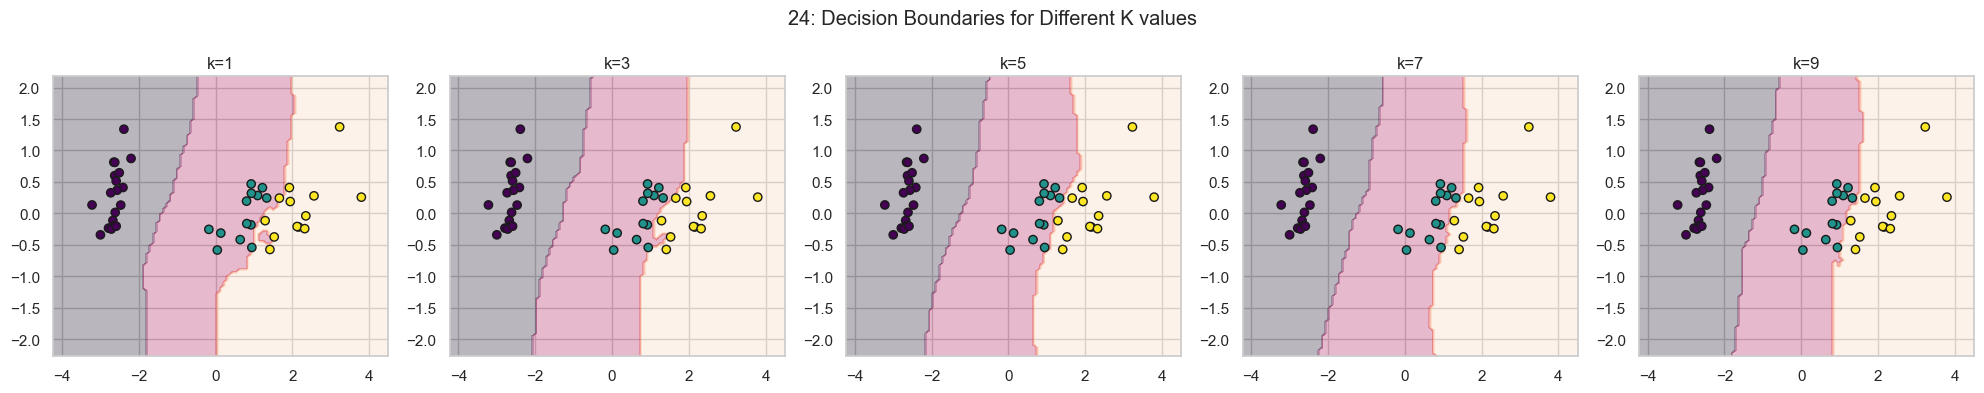

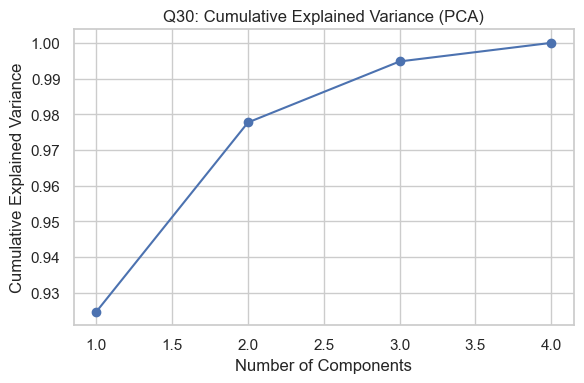

21: 1.0
22: 4609.2104607298825
23: {'Euclidean': 1.0, 'Manhattan': 1.0}
25: {'Scaled': 1.0, 'Unscaled': 1.0}
26: [3.60016186e-01 1.82170575e-01 1.54966370e-01 8.51032643e-02
 7.73835189e-02 5.28513228e-02 5.03784234e-02 3.71303388e-02
 6.14960990e-17 1.59054303e-17]
27: {'With PCA': 0.9555555555555556, 'Without PCA': 1.0}
28: {'Best K': 3, 'Best Score': np.float64(0.9428571428571428)}
29: 0


In [7]:
from sklearn.datasets import load_iris, make_regression, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.decomposition import PCA

sns.set(style='whitegrid')
results = {}

# Load Iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#21: Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
results["21"] = accuracy_score(y_test, y_pred)

#22: KNN Regressor
X_reg, y_reg = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg)
results["22"] = mean_squared_error(y_test_reg, y_pred_reg)

#23: Different Distance Metrics
acc_euclidean = accuracy_score(y_test, KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(X_train_scaled, y_train).predict(X_test_scaled))
acc_manhattan = accuracy_score(y_test, KNeighborsClassifier(n_neighbors=5, metric='manhattan').fit(X_train_scaled, y_train).predict(X_test_scaled))
results["23"] = {"Euclidean": acc_euclidean, "Manhattan": acc_manhattan}

#24: KNN with different K values (decision boundaries using PCA-reduced 2D)
X_pca_2d = PCA(n_components=2).fit_transform(X_iris)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_2d, y_iris, test_size=0.3, random_state=42)
ks = [1, 3, 5, 7, 9]
fig, axes = plt.subplots(1, len(ks), figsize=(20, 4))
for i, k in enumerate(ks):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_pca, y_train_pca)
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, alpha=0.3)
    axes[i].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, edgecolor='k', cmap='viridis')
    axes[i].set_title(f'k={k}')
plt.suptitle("24: Decision Boundaries for Different K values")
plt.tight_layout()
plt.show()

#25: Feature Scaling Comparison
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, knn_unscaled.predict(X_test))
results["25"] = {"Scaled": results["21"], "Unscaled": acc_unscaled}

#26: PCA explained variance on synthetic data
X_syn, _ = make_classification(n_samples=100, n_features=10, n_informative=5, random_state=42)
pca_syn = PCA()
pca_syn.fit(X_syn)
results["26"] = pca_syn.explained_variance_ratio_

# 27: Apply PCA before KNN Classifier
pca_iris = PCA(n_components=2)
X_train_pca2 = pca_iris.fit_transform(X_train_scaled)
X_test_pca2 = pca_iris.transform(X_test_scaled)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca2, y_train)
acc_with_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca2))
results["27"] = {"With PCA": acc_with_pca, "Without PCA": results["21"]}

# 28: Hyperparameter tuning with GridSearchCV
param_grid = {'n_neighbors': list(range(1, 11))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
results["28"] = {"Best K": grid.best_params_['n_neighbors'], "Best Score": grid.best_score_}

# 29: Misclassified samples
final_knn = KNeighborsClassifier(n_neighbors=5)
final_knn.fit(X_train_scaled, y_train)
y_pred_final = final_knn.predict(X_test_scaled)
misclassified = np.sum(y_pred_final != y_test)
results["29"] = misclassified

# 30: Cumulative explained variance (Iris)
pca_cumulative = PCA().fit(X_iris)
cumulative_variance = np.cumsum(pca_cumulative.explained_variance_ratio_)
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title("Q30: Cumulative Explained Variance (PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.show()

# Final results print
for task, res in results.items():
    print(f"{task}: {res}")



Task 31 - Accuracy:
Uniform weights: 1.00
Distance weights: 1.00

Task 32 - Mean Squared Error for different K values:
K=1: MSE = 3379.53
K=3: MSE = 2184.11
K=5: MSE = 2077.69
K=7: MSE = 2186.42
K=9: MSE = 2145.68

Task 33 - Missing values after KNN Imputation: 0



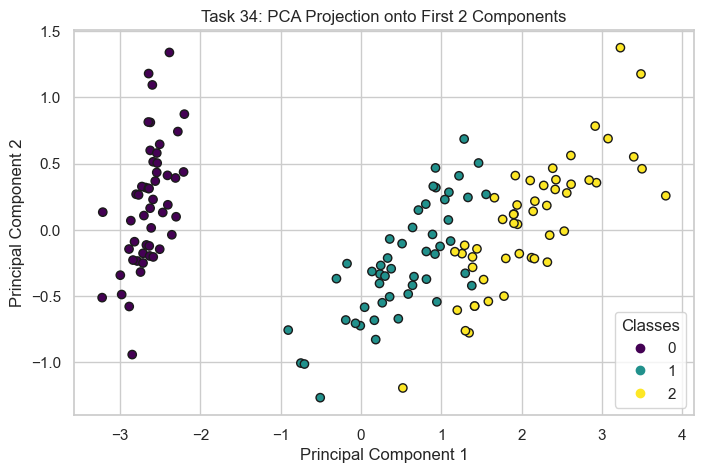

Task 35 - Accuracy with different tree algorithms:
KD Tree Accuracy: 1.00
Ball Tree Accuracy: 1.00


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, make_regression
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set random seed
np.random.seed(42)

# Load Iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Task 31: Compare weights parameter in KNN
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform').fit(X_train_scaled, y_train)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train_scaled, y_train)
acc_uniform = accuracy_score(y_test, knn_uniform.predict(X_test_scaled))
acc_distance = accuracy_score(y_test, knn_distance.predict(X_test_scaled))
print("Task 31 - Accuracy:")
print(f"Uniform weights: {acc_uniform:.2f}")
print(f"Distance weights: {acc_distance:.2f}\n")

# Task 32: KNN Regressor - effect of different K values
X_reg, y_reg = make_regression(n_samples=150, n_features=4, noise=0.3, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
print("Task 32 - Mean Squared Error for different K values:")
for k in [1, 3, 5, 7, 9]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_reg_train, y_reg_train)
    y_pred = model.predict(X_reg_test)
    mse = mean_squared_error(y_reg_test, y_pred)
    print(f"K={k}: MSE = {mse:.2f}")
print()

# Task 33: KNN Imputation
X_iris_missing = X_iris.copy()
X_iris_missing.ravel()[np.random.choice(X_iris_missing.size, 20, replace=False)] = np.nan
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_iris_missing)
print(f"Task 33 - Missing values after KNN Imputation: {np.isnan(X_imputed).sum()}\n")

# Task 34: PCA 2D Projection
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_iris)
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_iris, cmap='viridis', edgecolor='k')
plt.title("Task 34: PCA Projection onto First 2 Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()

# Task 35: KD Tree vs Ball Tree
kd_model = KNeighborsClassifier(algorithm='kd_tree')
ball_model = KNeighborsClassifier(algorithm='ball_tree')
kd_model.fit(X_train_scaled, y_train)
ball_model.fit(X_train_scaled, y_train)
acc_kd = accuracy_score(y_test, kd_model.predict(X_test_scaled))
acc_ball = accuracy_score(y_test, ball_model.predict(X_test_scaled))
print("Task 35 - Accuracy with different tree algorithms:")
print(f"KD Tree Accuracy: {acc_kd:.2f}")
print(f"Ball Tree Accuracy: {acc_ball:.2f}")


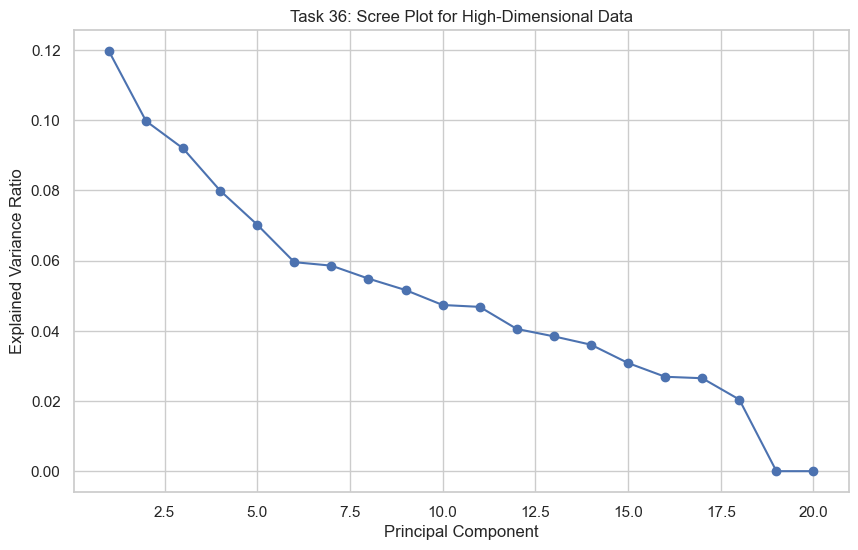

Task 37 - Classification Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Task 38 - Accuracy for different PCA components:
1 component(s): Accuracy = 0.96
2 component(s): Accuracy = 0.96
3 component(s): Accuracy = 1.00
4 component(s): Accuracy = 1.00

Task 39 - Accuracy with different leaf_size values:
Leaf Size 10: Accuracy = 1.00
Leaf Size 20: Accuracy = 1.00
Leaf Size 30: Accuracy = 1.00
Leaf Size 40: Accuracy = 1.00
Leaf Size 50: Accuracy = 1.00


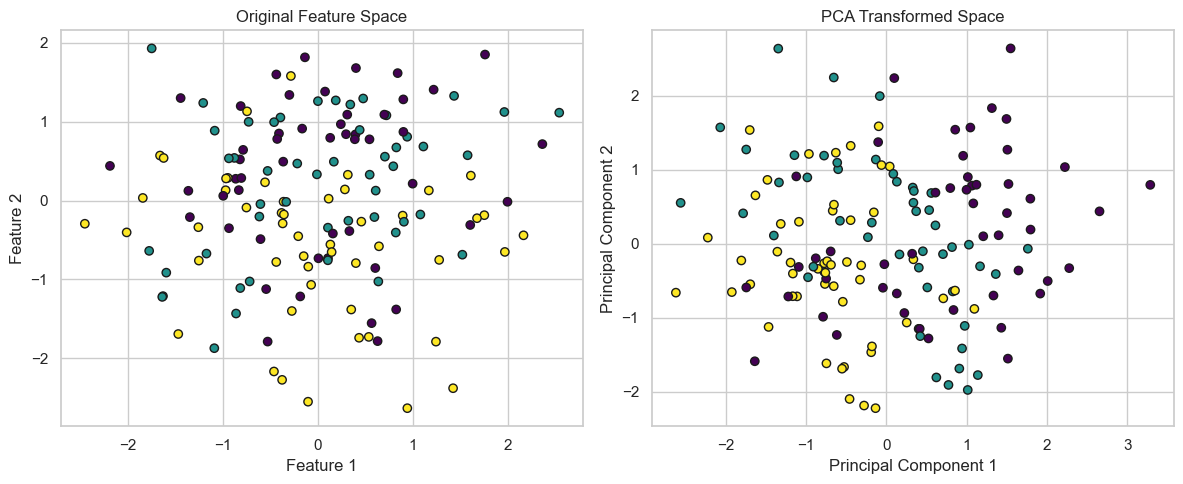

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Task 36: Scree plot for high-dimensional data
X_hd, _ = make_classification(n_samples=200, n_features=20, n_informative=10, random_state=42)
X_hd_scaled = StandardScaler().fit_transform(X_hd)
pca_hd = PCA()
pca_hd.fit(X_hd_scaled)
explained_var_ratio = pca_hd.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.title("Task 36: Scree Plot for High-Dimensional Data")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

# Task 37: KNN performance with precision, recall, F1
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Task 37 - Classification Metrics:")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='macro'):.2f}")

# Task 38: PCA components vs accuracy
print("\nTask 38 - Accuracy for different PCA components:")
for n in range(1, 5):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    knn_pca = KNeighborsClassifier(n_neighbors=3)
    knn_pca.fit(X_train_pca, y_train)
    acc = knn_pca.score(X_test_pca, y_test)
    print(f"{n} component(s): Accuracy = {acc:.2f}")

# Task 39: KNN with different leaf_size values
print("\nTask 39 - Accuracy with different leaf_size values:")
for leaf_size in [10, 20, 30, 40, 50]:
    knn_leaf = KNeighborsClassifier(n_neighbors=3, leaf_size=leaf_size)
    knn_leaf.fit(X_train_scaled, y_train)
    acc = knn_leaf.score(X_test_scaled, y_test)
    print(f"Leaf Size {leaf_size}: Accuracy = {acc:.2f}")

# Task 40: Visualize original vs PCA-transformed data
X_vis, y_vis = make_classification(
    n_samples=150, n_features=4, n_informative=3, 
    n_redundant=0, n_classes=3, random_state=42
)
X_vis_scaled = StandardScaler().fit_transform(X_vis)
pca_vis = PCA(n_components=2).fit_transform(X_vis_scaled)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, cmap='viridis', edgecolor='k')
ax[0].set_title("Original Feature Space")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

ax[1].scatter(pca_vis[:, 0], pca_vis[:, 1], c=y_vis, cmap='viridis', edgecolor='k')
ax[1].set_title("PCA Transformed Space")
ax[1].set_xlabel("Principal Component 1")
ax[1].set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


Task 41:
Accuracy without PCA: 1.00
Accuracy with PCA: 0.96

Task 42: Confusion Matrix
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]


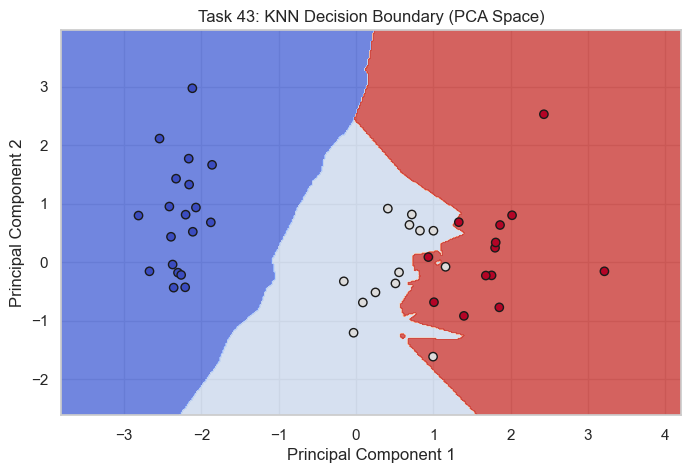


Task 44: Regression Metrics
MSE: 658.84
R2 Score: 0.92


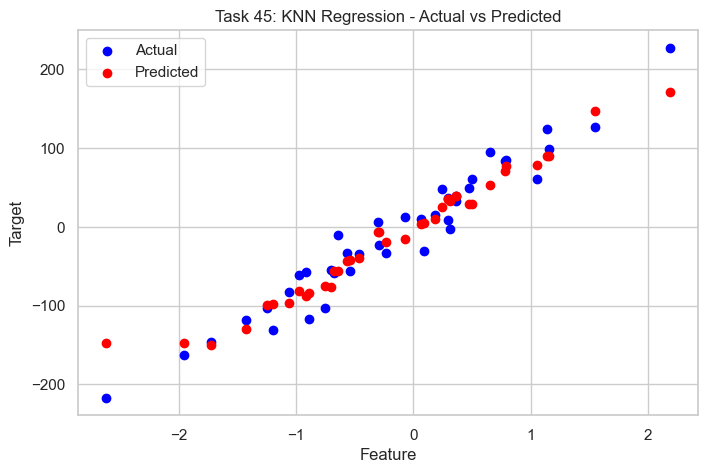

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

# Load and preprocess Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Task 41: Accuracy with and without PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_orig = KNeighborsClassifier(n_neighbors=3)
knn_orig.fit(X_train, y_train)
acc_no_pca = knn_orig.score(X_test, y_test)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
acc_with_pca = knn_pca.score(X_test_pca, y_test)

print("Task 41:")
print(f"Accuracy without PCA: {acc_no_pca:.2f}")
print(f"Accuracy with PCA: {acc_with_pca:.2f}")

# Task 42: Confusion Matrix
y_pred_pca = knn_pca.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred_pca)
print("\nTask 42: Confusion Matrix")
print(conf_matrix)

# Task 43: Decision boundary after PCA
h = 0.02
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', cmap='coolwarm')
plt.title("Task 43: KNN Decision Boundary (PCA Space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Task 44: KNN Regression
X_reg, y_reg = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_reg_train, y_reg_train)
y_pred_reg = knn_reg.predict(X_reg_test)

mse = mean_squared_error(y_reg_test, y_pred_reg)
r2 = r2_score(y_reg_test, y_pred_reg)
print("\nTask 44: Regression Metrics")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Task 45: Regression prediction plot
plt.figure(figsize=(8, 5))
plt.scatter(X_reg_test, y_reg_test, color='blue', label='Actual')
plt.scatter(X_reg_test, y_pred_reg, color='red', label='Predicted')
plt.title("Task 45: KNN Regression - Actual vs Predicted")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


In [11]:
from sklearn.impute import KNNImputer
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np

# Load Iris dataset and introduce missing values
iris = load_iris()
X, y = iris.data, iris.target
rng = np.random.RandomState(42)
missing_mask = rng.rand(*X.shape) < 0.1  # 10% missing
X[missing_mask] = np.nan

# Task 46: Handle missing values using KNN imputation
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X)

# Task 47: Train KNN on imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_test_scaled, y_test)
print("Task 47: Accuracy after KNN imputation:", accuracy)

# Task 48: PCA after imputation
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Task 49: KNN on PCA-reduced imputed data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
accuracy_pca = knn_pca.score(X_test_pca, y_test)
print("Task 49: Accuracy after PCA on imputed data:", accuracy_pca)

# Task 50: Compare and print final accuracies
print("\nTask 50: Comparison")
print(f"Original KNN accuracy after imputation: {accuracy:.2f}")
print(f"KNN accuracy after PCA: {accuracy_pca:.2f}")


Task 47: Accuracy after KNN imputation: 1.0
Task 49: Accuracy after PCA on imputed data: 0.9555555555555556

Task 50: Comparison
Original KNN accuracy after imputation: 1.00
KNN accuracy after PCA: 0.96
